# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

## Perform API Calls

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

********************************
City Number and Name Information
********************************
City Number - 1 | City Name - camopi
City Number - 2 | City Name - nouadhibou
City Not Found
City Number - 3 | City Name - portland
City Number - 4 | City Name - ahipara
City Number - 5 | City Name - khomutovo
City Number - 6 | City Name - port alfred
City Number - 7 | City Name - rio gallegos
City Number - 8 | City Name - kaitangata
City Number - 9 | City Name - ushuaia
City Number - 10 | City Name - saint george
City Number - 11 | City Name - victor harbor
City Number - 12 | City Name - tucumcari
City Number - 13 | City Name - yerbogachen
City Number - 14 | City Name - castro
City Number - 15 | City Name - cabo san lucas
City Number - 16 | City Name - punta arenas
City Number - 17 | City Name - ampanihy
City Number - 18 | City Name - arlit
City Number - 19 | City Name - busselton
City Number - 20 | City Name - hithadhoo
City Not Found
City Number - 21 | City Name - albany
City Number - 

City Number - 194 | City Name - omboue
City Number - 195 | City Name - lompoc
City Number - 196 | City Name - touros
City Number - 197 | City Name - vagamo
City Number - 198 | City Name - dikson
City Number - 199 | City Name - klaksvik
City Not Found
City Number - 200 | City Name - etchojoa
City Number - 201 | City Name - vanimo
City Number - 202 | City Name - suntar
City Number - 203 | City Name - whitehorse
City Number - 204 | City Name - sarkand
City Number - 205 | City Name - amga
City Number - 206 | City Name - fukue
City Number - 207 | City Name - siderno
City Number - 208 | City Name - arivonimamo
City Number - 209 | City Name - huarmey
City Number - 210 | City Name - coacoyul
City Number - 211 | City Name - vao
City Not Found
City Number - 212 | City Name - walvis bay
City Number - 213 | City Name - avarua
City Number - 214 | City Name - bambous virieux
City Number - 215 | City Name - lokosovo
City Not Found
City Number - 216 | City Name - veraval
City Number - 217 | City Name 

City Number - 386 | City Name - isabela
City Not Found
City Number - 387 | City Name - huangnihe
City Number - 388 | City Name - beringovskiy
City Number - 389 | City Name - batagay
City Number - 390 | City Name - zarubino
City Number - 391 | City Name - kautokeino
City Number - 392 | City Name - songling
City Number - 393 | City Name - wanning
City Number - 394 | City Name - lewistown
City Number - 395 | City Name - rosetta
City Number - 396 | City Name - norsup
City Number - 397 | City Name - inuvik
City Not Found
City Number - 398 | City Name - rocha
City Number - 399 | City Name - port hawkesbury
City Number - 400 | City Name - kudahuvadhoo
City Number - 401 | City Name - noyabrsk
City Number - 402 | City Name - grand-santi
City Number - 403 | City Name - adamas
City Number - 404 | City Name - celestun
City Number - 405 | City Name - yumen
City Number - 406 | City Name - narkevychi
City Number - 407 | City Name - qasigiannguit
City Number - 408 | City Name - lima
City Number - 409 

## Convert Raw Data to DataFrame

In [4]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': pd.to_datetime(date, unit="s")
    })
city_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camopi,3.1655,-52.3158,71.83,98,100,2.84,GF,2021-02-11 01:12:37
1,Nouadhibou,20.9310,-17.0347,64.40,72,0,18.41,MR,2021-02-11 01:12:37
2,Portland,45.5234,-122.6762,45.00,49,75,4.61,US,2021-02-11 01:07:48
3,Ahipara,-35.1667,173.1667,66.45,71,99,11.50,NZ,2021-02-11 01:12:38
4,Khomutovo,52.4658,104.4025,-2.20,92,0,2.24,RU,2021-02-11 01:12:38


In [5]:
# Push data to CSV File
city_df.to_csv('Cities Compiled.csv')

In [6]:
# Defined variables for useful information to plot
lats = city_df['Latitude']
temps = city_df['Maximum Temperature']
hums = city_df['Humidity']
clouds = city_df['Cloudiness']
winds = city_df['Wind Speed']

## Plotted Data

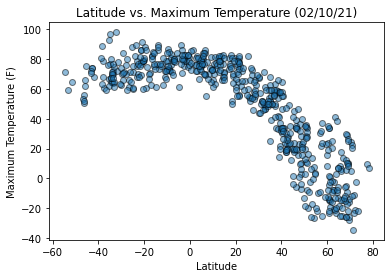

In [7]:
# Latitude vs. Temperature Plot
plt.scatter(lats, temps, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Maximum Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

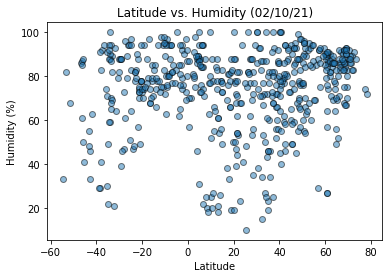

In [8]:
plt.scatter(lats, hums, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

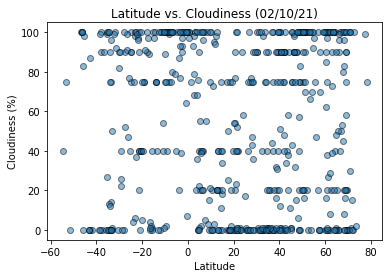

In [9]:
plt.scatter(lats, clouds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

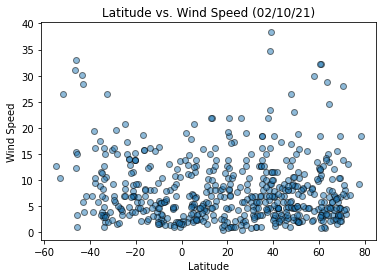

In [10]:
plt.scatter(lats, winds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [11]:
# Create function for calling linear regression on plots
def lin_reg(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=.5)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='black')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
s_hemi_df = city_df[city_df['Latitude'] <= 0]

The r-value is: 0.7902639809969628


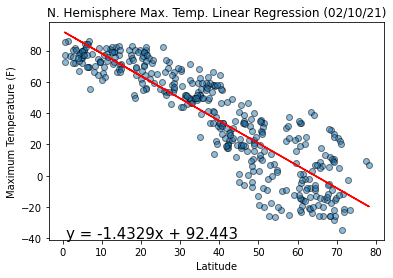

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Maximum Temperature']
plt.title("N. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (1,-40))
plt.savefig('graphs/NorthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.17781095682805598


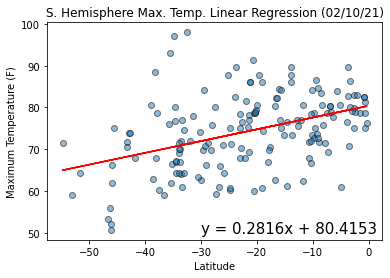

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Maximum Temperature']
plt.title("S. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (-30,50))
plt.savefig('graphs/SouthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.05769389749905681


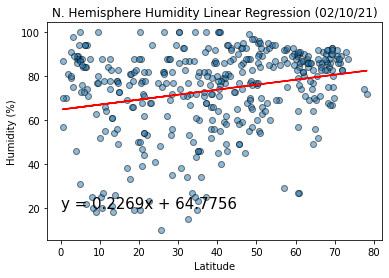

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Humidity']
plt.title("N. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (0,20))
plt.savefig('graphs/NorthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.1346770453543939


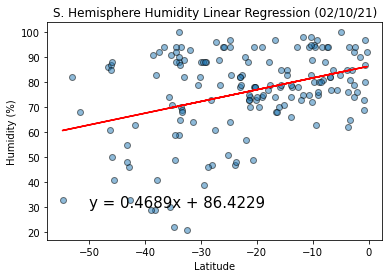

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Humidity']
plt.title("S. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (-50,30))
plt.savefig('graphs/SouthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.014110385621629844


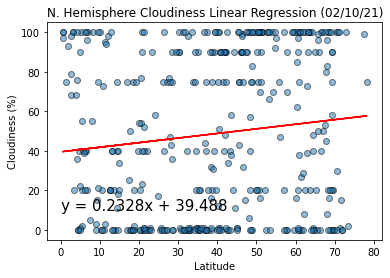

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Cloudiness']
plt.title("N. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (0,10))
plt.savefig('graphs/NorthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.07397390273076256


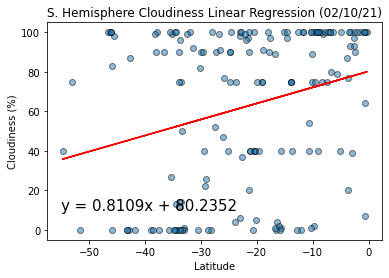

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Cloudiness']
plt.title("S. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (-55,10))
plt.savefig('graphs/SouthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.0005664654991017064


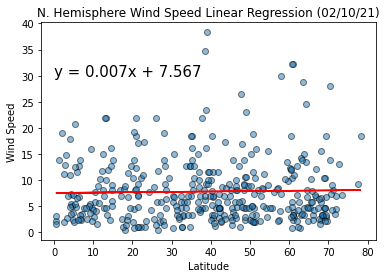

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Wind Speed']
plt.title("N. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (0,30))
plt.savefig('graphs/NorthernWindSpeedLatitudeLinearRegression.png')

The r-value is: 0.13830343865349795


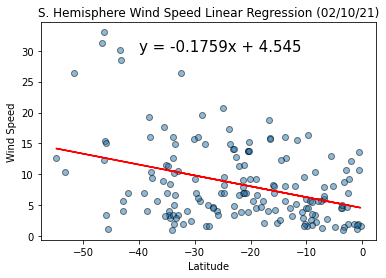

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Wind Speed']
plt.title("S. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (-40,30))
plt.savefig('graphs/SouthernWindSpeedLatitudeLinearRegression.png')